In [1]:
import pandas as pd
import numpy as np

# load data

In [2]:
df_ko = pd.read_csv(r'resources\Tillotson_KO_deg_rp.csv')
df_ko

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_symbol,radial_position
0,ENSMUSG00000051951.5,4596.96100,-0.034834,0.075914,0.458859,0.646336,0.822664,ENSMUSG00000051951,Xkr4,0.816454
1,ENSMUSG00000102331.1,1054.51760,-0.065015,0.081316,0.799540,0.423978,0.664042,ENSMUSG00000102331,Gm19938,0.816454
2,ENSMUSG00000025902.13,137.87770,0.148976,0.234180,-0.636160,0.524672,0.747444,ENSMUSG00000025902,Sox17,0.816454
3,ENSMUSG00000033845.13,1123.44100,0.014950,0.032770,-0.456230,0.648224,0.823454,ENSMUSG00000033845,Mrpl15,0.816454
4,ENSMUSG00000025903.14,780.80460,0.097723,0.071647,-1.363964,0.172579,0.394600,ENSMUSG00000025903,Lypla1,0.816454
...,...,...,...,...,...,...,...,...,...,...
12951,ENSMUSG00000087201.1,246.76147,0.031288,0.140947,-0.221985,0.824325,0.923218,ENSMUSG00000087201,Gm15261,0.813251
12952,ENSMUSG00000031352.10,880.72656,0.080400,0.084533,-0.951114,0.341546,0.589866,ENSMUSG00000031352,Hccs,0.813251
12953,ENSMUSG00000087159.7,186.40870,0.069706,0.139137,-0.500985,0.616382,0.806545,ENSMUSG00000087159,Gm15246,0.813251
12954,ENSMUSG00000035299.16,1022.48346,0.982884,0.572803,-1.715921,0.086177,0.248653,ENSMUSG00000035299,Mid1,0.797202


In [3]:
df_mm2 = pd.read_csv(r'resources\Tillotson_MM2_deg_with_rp.csv')
df_mm2

,Geneid,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_symbol,radial_position
0,ENSMUSG00000051951.5,4090.48900,0.053954,0.048097,-1.121778,0.261957,0.572690,ENSMUSG00000051951,Xkr4,0.816454
1,ENSMUSG00000102331.1,954.20390,0.115978,0.082100,-1.412634,0.157763,0.428532,ENSMUSG00000102331,Gm19938,0.816454
2,ENSMUSG00000025902.13,126.69885,-0.193941,0.152630,1.270662,0.203849,0.499206,ENSMUSG00000025902,Sox17,0.816454
3,ENSMUSG00000033845.13,955.55786,-0.057941,0.038656,1.498905,0.133898,0.390095,ENSMUSG00000033845,Mrpl15,0.816454
4,ENSMUSG00000025903.14,636.06570,-0.067835,0.083763,0.809843,0.418030,0.723582,ENSMUSG00000025903,Lypla1,0.816454
...,...,...,...,...,...,...,...,...,...,...
12894,ENSMUSG00000087201.1,239.37940,0.320489,0.132255,-2.423264,0.015382,0.090844,ENSMUSG00000087201,Gm15261,0.813251
12895,ENSMUSG00000031352.10,794.10333,-0.023348,0.075800,0.308014,0.758071,0.916667,ENSMUSG00000031352,Hccs,0.813251
12896,ENSMUSG00000087159.7,148.26805,0.144121,0.073383,-1.963960,0.049535,0.208675,ENSMUSG00000087159,Gm15246,0.813251
12897,ENSMUSG00000035299.16,1377.77890,0.110256,0.369589,-0.298320,0.765459,0.918587,ENSMUSG00000035299,Mid1,0.797202


In [4]:
import numpy as np
def get_upper_bound(all_values, bin_size=10):
    percentiles = np.arange(0,100, bin_size)
    percentiles = percentiles + bin_size
    upper_bound = []
    for p in percentiles:
        upper_bound.append(np.percentile(all_values, p))
    upper_bound = np.array(upper_bound)
    return upper_bound

upper_bound = get_upper_bound(df_ko['radial_position'].values)
df_ko['rp_interval'] = df_ko['radial_position'].apply(lambda x: np.argmax(upper_bound>=x))

upper_bound = get_upper_bound(df_mm2['radial_position'].values)
df_mm2['rp_interval'] = df_mm2['radial_position'].apply(lambda x: np.argmax(upper_bound>=x))

# Plot

In [5]:
import matplotlib as mpl

figure_folder = r'figures\mecp2_mutations'


mpl.rc('figure', dpi=300)
mpl.rc('figure', titlesize=9.) 
mpl.rc('figure.constrained_layout', use=True)

mpl.rc('axes', labelsize=7.)
mpl.rc('axes', titlesize=8.)
mpl.rc('axes', linewidth=0.5)

mpl.rc('font', family='Arial')

mpl.rc('savefig', dpi=300)
mpl.rc('savefig', format='pdf')

mpl.rc('xtick', labelsize=6.5)
mpl.rc('xtick.major', size=3)
mpl.rc('xtick.major', width=0.5)

mpl.rc('ytick', labelsize=6.5)
mpl.rc('ytick.major', size=3)
mpl.rc('ytick.major', width=0.5)

mpl.rcParams['pdf.fonttype'] = 42

meta NOT subset; don't know how to subset; dropped


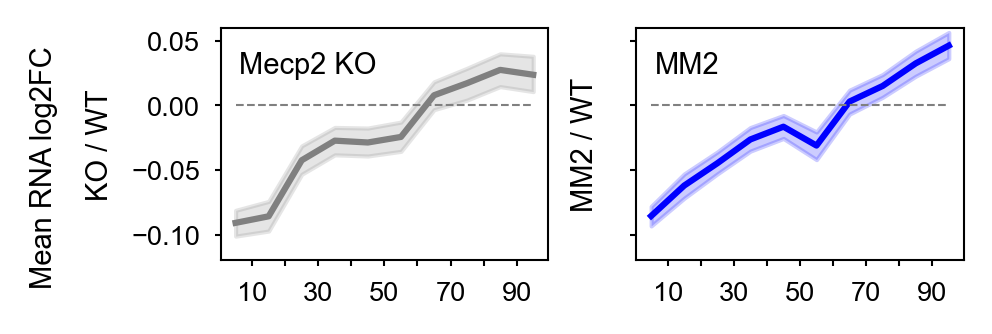

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(3,1), dpi=300)


#####  
ax1 = fig.add_subplot(121)

sns.lineplot(data=df_ko, x='rp_interval', y='log2FoldChange', ax=ax1, color='gray')

ax1.plot([0,9], [0,0], color='gray', linewidth=0.5, linestyle='--')

ax1.set_xticks([])
ax1.set_xlabel(None)
ax1.set_ylabel('KO / WT', fontsize=7)
ax1.set_yticks([-0.1, -0.05, 0, 0.05])
ax1.set_ylim(-0.12,0.06)
ax1.text(0.1,0.025, 'Mecp2 KO', fontsize=7)
ax1.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],[10,'',30,'',50,'',70,'',90], fontsize=6.5)
ax1.tick_params(axis='both',length=1.5)
####
ax2 = fig.add_subplot(122)

sns.lineplot(data=df_mm2, x='rp_interval', y='log2FoldChange', ax=ax2, color='blue')

ax2.plot([0,9], [0,0], color='gray', linewidth=0.5, linestyle='--')

ax2.set_xticks([])
ax2.set_xlabel(None)
ax2.set_ylabel('MM2 / WT', fontsize=7)
ax2.set_yticks([-0.1, -0.05, 0, 0.05],['','','',''])
ax2.set_ylim(-0.12,0.06)
ax2.text(0.1,0.025, 'MM2', fontsize=7)
ax2.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5],[10,'',30,'',50,'',70,'',90], fontsize=6.5)
ax2.tick_params(axis='both',length=1.5)

fig.supylabel('Mean RNA log2FC', x=-0.05, fontsize=7)

import os
figure_name = 'MM2_mutation.pdf'
plt.savefig(figure_name)

plt.show()